# Reddit Mental Health Prediction Using UnStructured Dataset

# Objectives:
The objective of this project is to develop and evaluate machine learning models to accurately classify mental health conditions—Stress (0), Depression (1), and Anxiety (2)—from unstructured Reddit text data. This involves preprocessing the text data, extracting meaningful features using ESA, building and comparing multiple classification algorithms, and validating model performance using k-fold cross-validation.

In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving data_to_be_cleansed.csv to data_to_be_cleansed.csv


# Pre_processing


In [6]:
import pandas as pd

df = pd.read_csv('data_to_be_cleansed.csv')

# Display the first 5 rows
df.head()


,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1


📊 Selected Relevant Column
Used the text column as the input feature for analysis and classification.

In [7]:
import pandas as pd

# Drop 'Unnamed: 0' and 'title' columns
df = df.drop(columns=["Unnamed: 0", "title"])

# Check the updated DataFrame
df.head()


,text,target
0,Welcome to /r/depression's check-in post - a p...,1
1,We understand that most people who reply immed...,1
2,Anyone else just miss physical touch? I crave ...,1
3,I’m just so ashamed. Everyone and everything f...,1
4,I really need a friend. I don't even have a si...,1


from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'target'}, axis=1)
              .sort_values('target', ascending=True))
  xs = counted['target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('count()')

In this step, we retain only the rows from the dataset where the target column has values 0, 1, or 4. This helps focus the classification task on selected categories and eliminates unwanted classes (e.g., 2 and 3).



In [ ]:
df = df[df['target'].isin([0, 1, 4])]
df = df.reset_index(drop=True)
# Check updated class distribution
df['target'].value_counts()

,count
target,
1,1202
4,1188
0,1181


To make the class labels more intuitive and consistent, we replace all instances of target = 4 with target = 2. This allows the model to work with a clean set of labels: 0 (Stress), 1 (Depression), and 2 (Anxiety), improving interpretability and potentially model performance.



In [9]:
df['target'] = df['target'].replace(4, 2)
print(df['target'].value_counts())


target
1    1202
2    1188
0    1181
Name: count, dtype: int64


In [13]:
# Check the number of missing values per column
print(df.isnull().sum())


text      126
target      0
dtype: int64


In [15]:
df = df.dropna(subset=['text'])
# Again Check the number of missing values per column
# Ensure drop the missing values
print(df.isnull().sum())

text      0
target    0
dtype: int64


🧹 Data Cleaning:
 Cleaned the text by removing stop words, special characters, lowercasing, and performing lemmatization.



In [16]:
# Check sample raw text
print(df['text'].iloc[0])

# Check for URLs in the text
df['has_url'] = df['text'].str.contains('http|www', regex=True)
print(df['has_url'].sum(), "posts contain URLs")

# Check for special characters (non-alphanumeric)
df['special_chars'] = df['text'].str.contains(r'[^a-zA-Z0-9\s]', regex=True)
print(df['special_chars'].sum(), "posts contain special characters")

# Check for uppercase letters
df['has_upper'] = df['text'].str.contains(r'[A-Z]')
print(df['has_upper'].sum(), "posts contain uppercase letters")

# Check for numbers
df['has_numbers'] = df['text'].str.contains(r'\d')
print(df['has_numbers'].sum(), "posts contain numbers")

# Check for empty or very short posts
print(df['text'].apply(lambda x: len(x.strip()) == 0).sum(), "posts are empty")
print((df['text'].str.len() < 5).sum(), "posts have fewer than 5 characters")


Welcome to /r/depression's check-in post - a place to take a moment and share what is going on and how you are doing. If you have an accomplishment you want to talk about (these shouldn't be standalone posts in the sub as they violate the "role model" rule, but are welcome here), or are having a tough time but prefer not to make your own post, this is a place you can share.

-----

Our subreddit rules are located in the sidebar (you can also always access them at https://www.reddit.com/r/depression/about/rules) - since all of them exist for important safety reasons, we ask everyone here to read and follow them. Please click 'report' on any harmful content you see here - we always want to know and deal as soon as we can.

We also have several wikis there for help with finding and giving support:

https://www.reddit.com/r/depression/wiki/what_is_depression provides guidance about what is and isn't a depressive disorder, guidance on the complex nature of the illnesses that are usually gro

In [17]:
import pandas as pd
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and punctuation (keep letters, numbers, and spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Remove numbers if you want (optional)
    # text = re.sub(r'\d+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function on the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Check cleaned text samples
print(df[['text', 'cleaned_text']].head())


                                                text  \
0  Welcome to /r/depression's check-in post - a p...   
1  We understand that most people who reply immed...   
2  Anyone else just miss physical touch? I crave ...   
3  I’m just so ashamed. Everyone and everything f...   
4  I really need a friend. I don't even have a si...   

                                        cleaned_text  
0  welcome to rdepressions checkin post a place t...  
1  we understand that most people who reply immed...  
2  anyone else just miss physical touch i crave i...  
3  im just so ashamed everyone and everything fee...  
4  i really need a friend i dont even have a sing...  


🔍 Exploratory Sentiment Analysis (ESA)
Visualized word clouds and class distribution to understand the emotional tone and data balance.

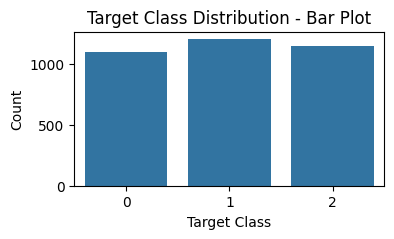

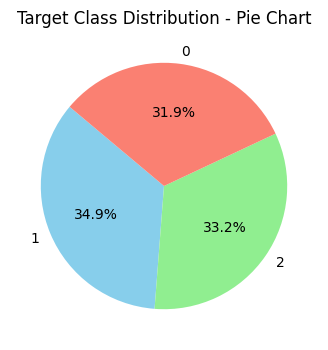

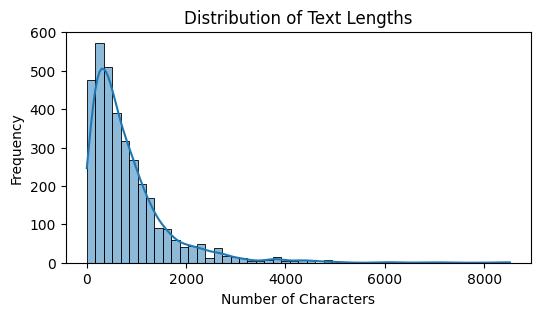

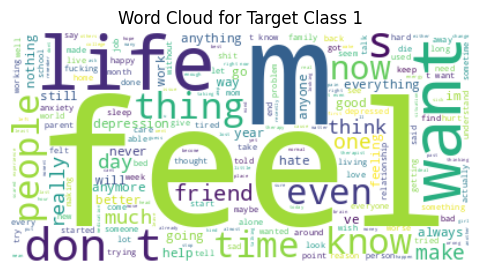

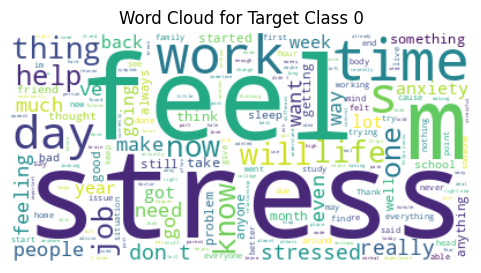

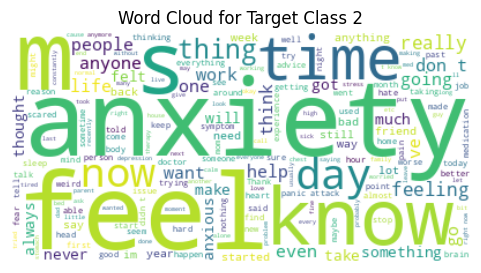

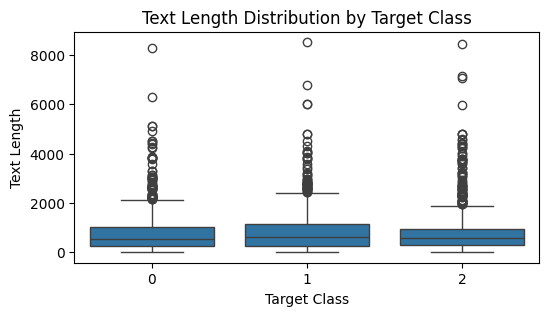

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files
import os

# Create folder for saving images
os.makedirs('eda_plots', exist_ok=True)

# 1. Target Class Distribution - Bar Plot
plt.figure(figsize=(4,2))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution - Bar Plot')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.savefig('eda_plots/target_distribution_bar.png')
plt.show()  # Show in Colab
plt.close()

# 2. Target Class Distribution - Pie Chart
plt.figure(figsize=(4,4))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Target Class Distribution - Pie Chart')
plt.ylabel('')
plt.savefig('eda_plots/target_distribution_pie.png')
plt.show()
plt.close()

# 3. Text Length Distribution Histogram
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(6,3))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.savefig('eda_plots/text_length_histogram.png')
plt.show()
plt.close()

# 4. Word Clouds for each target class
def save_and_show_wordcloud(data, filename, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(filename)
    plt.show()
    plt.close()

for t in df['target'].unique():
    save_and_show_wordcloud(df[df['target'] == t]['text'], f'eda_plots/wordcloud_target_{t}.png', f'Word Cloud for Target Class {t}')

# 5. Text Length by Target Class - Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Text Length Distribution by Target Class')
plt.xlabel('Target Class')
plt.ylabel('Text Length')
plt.savefig('eda_plots/text_length_boxplot.png')
plt.show()
plt.close()



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # Use top 5000 words
    lowercase=True          # Ensure all text is lowercase
)

# 2. Fit and transform the text data
X = tfidf.fit_transform(df['text'])  # X is the feature matrix
y = df['target']                     # y is the target variable (0=Stress, 1=Depression, 2=Anxiety)

# 3. Print shape of the TF-IDF matrix
print("TF-IDF Matrix shape:", X.shape)


TF-IDF Matrix shape: (3445, 5000)


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Your input texts
texts = df['text'].values

# Your target labels (numeric)
y = df['target'].values

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform texts to get numerical features
X_tfidf = vectorizer.fit_transform(texts)


# 🧠 Model Building
Trained and evaluated five ML models for classification:

SVM: Achieved strong results using TF-IDF and LinearSVC.

Random Forest: Performed well with high AUC scores for each class.

ANN: Built a basic neural network model for prediction.

Decision Tree: Simple tree-based classifier trained on TF-IDF features.

XGBoost: Gradient boosting model applied with good performance metrics.



In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


LogisticRegression Accuracy: 0.8301886792452831

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       220
           1       0.84      0.84      0.84       240
           2       0.81      0.83      0.82       229

    accuracy                           0.83       689
   macro avg       0.83      0.83      0.83       689
weighted avg       0.83      0.83      0.83       689


Confusion Matrix:
 [[181  20  19]
 [ 13 202  25]
 [ 21  19 189]]


In [32]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model (LinearSVC)
svm_model = LinearSVC(max_iter=10000, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM (LinearSVC) Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM (LinearSVC) Accuracy: 0.8447024673439768

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       220
           1       0.86      0.82      0.84       240
           2       0.81      0.84      0.83       229

    accuracy                           0.84       689
   macro avg       0.85      0.85      0.85       689
weighted avg       0.85      0.84      0.84       689


Confusion Matrix:
 [[192  13  15]
 [ 13 197  30]
 [ 18  18 193]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8432510885341074

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       220
           1       0.79      0.88      0.83       240
           2       0.82      0.84      0.83       229

    accuracy                           0.84       689
   macro avg       0.85      0.84      0.85       689
weighted avg       0.85      0.84      0.84       689


Confusion Matrix:
 [[179  26  15]
 [  3 210  27]
 [  6  31 192]]


In [34]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:11:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8258345428156749

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       220
           1       0.80      0.83      0.82       240
           2       0.81      0.80      0.81       229

    accuracy                           0.83       689
   macro avg       0.83      0.83      0.83       689
weighted avg       0.83      0.83      0.83       689


Confusion Matrix:
 [[186  17  17]
 [ 14 199  27]
 [ 13  32 184]]


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train, y_train)

# Predict on test set
y_pred_mnb = mnb_model.predict(X_test)

# Evaluate the model
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))


Multinomial Naive Bayes Accuracy: 0.7503628447024674

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72       220
           1       0.70      0.84      0.77       240
           2       0.72      0.79      0.75       229

    accuracy                           0.75       689
   macro avg       0.77      0.75      0.75       689
weighted avg       0.77      0.75      0.75       689


Confusion Matrix:
 [[135  48  37]
 [  6 202  32]
 [ 12  37 180]]


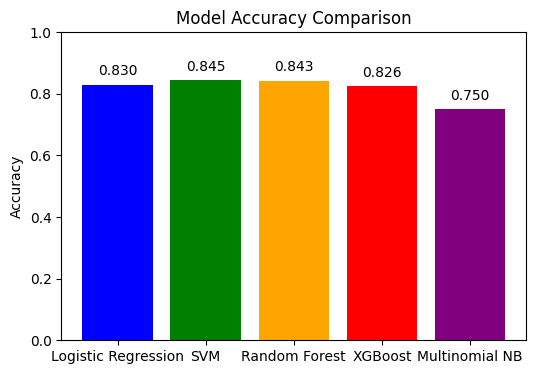

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracies
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'Multinomial NB']
accuracies = [
    accuracy_score(y_test, y_pred),       # Logistic Regression
    accuracy_score(y_test, y_pred_svm),   # SVM
    accuracy_score(y_test, y_pred_rf),    # Random Forest
    accuracy_score(y_test, y_pred_xgb),   # XGBoost
    accuracy_score(y_test, y_pred_mnb)    # Multinomial Naive Bayes
]

# Plotting
plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim([0, 1])  # accuracy between 0 and 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

plt.show()


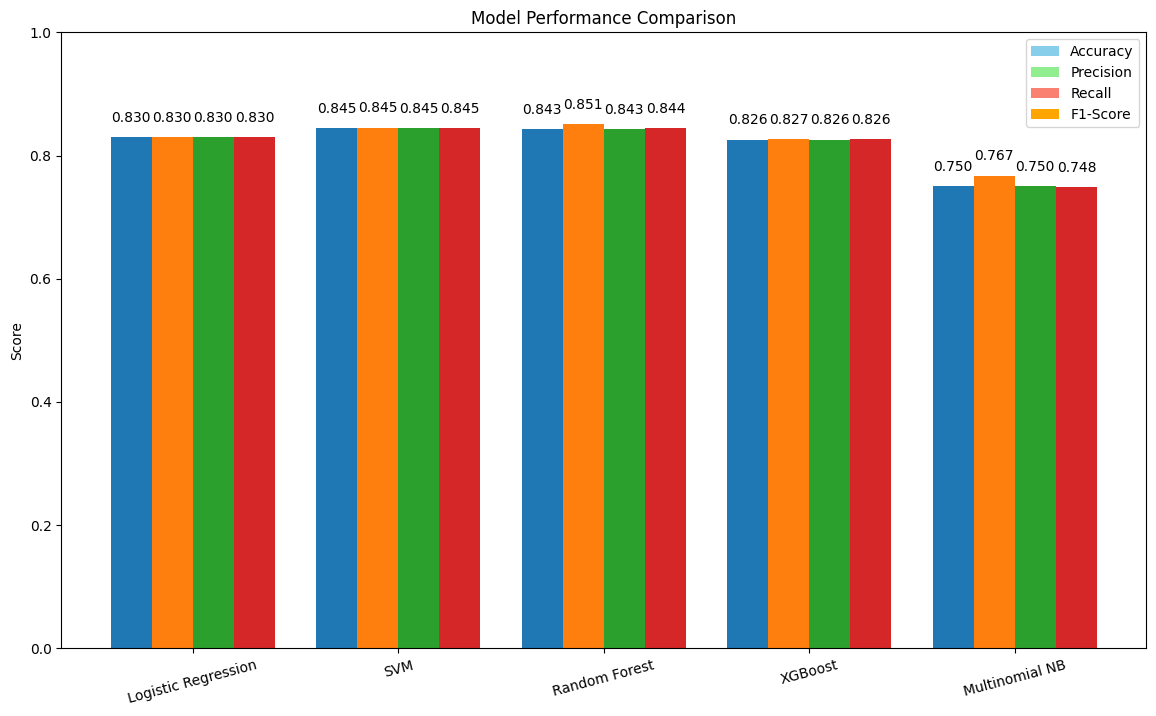

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Models and their predictions
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'Multinomial NB']
predictions = [y_pred, y_pred_svm, y_pred_rf, y_pred_xgb, y_pred_mnb]

# Prepare lists to hold metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each model
for y_pred_model in predictions:
    accuracies.append(accuracy_score(y_test, y_pred_model))
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_model, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# X-axis positions
x = np.arange(len(models))

# Width of bars
width = 0.2

# Plotting grouped bars
plt.figure(figsize=(14,8))

plt.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, precisions, width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, recalls, width, label='Recall', color='salmon')
plt.bar(x + 1.5*width, f1_scores, width, label='F1-Score', color='orange')

# Labels and title
plt.ylabel('Score')
plt.ylim([0,1])
plt.xticks(x, models, rotation=15)
plt.title('Model Performance Comparison')
plt.legend()

# Add numeric value on top of bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.3f}', ha='center', va='bottom')

bars_acc = plt.bar(x - 1.5*width, accuracies, width)
bars_prec = plt.bar(x - 0.5*width, precisions, width)
bars_rec = plt.bar(x + 0.5*width, recalls, width)
bars_f1 = plt.bar(x + 1.5*width, f1_scores, width)

add_values(bars_acc)
add_values(bars_prec)
add_values(bars_rec)
add_values(bars_f1)

plt.show()


In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Set up Stratified K-Fold
k = 5  # You can also try 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize model
svm_model = LinearSVC(max_iter=10000, random_state=42)

# Store results
accuracies = []
f1_scores = []

fold = 1
for train_index, test_index in skf.split(X_tfidf, y):
    print(f"\nFold {fold}")
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train
    svm_model.fit(X_train, y_train)

    # Predict
    y_pred = svm_model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    f1 = report['weighted avg']['f1-score']

    print("Accuracy:", acc)
    print("F1 Score:", f1)

    accuracies.append(acc)
    f1_scores.append(f1)
    fold += 1

# Final results
print("\n=== Average Results Across Folds ===")
print("Mean Accuracy:", np.mean(accuracies))
print("Mean F1 Score:", np.mean(f1_scores))



Fold 1
Accuracy: 0.8693759071117562
F1 Score: 0.869672359688151

Fold 2
Accuracy: 0.8505079825834543
F1 Score: 0.8503088197221593

Fold 3
Accuracy: 0.8330914368650217
F1 Score: 0.83327232614306

Fold 4
Accuracy: 0.8679245283018868
F1 Score: 0.8679133746185024

Fold 5
Accuracy: 0.8447024673439768
F1 Score: 0.844272592206757

=== Average Results Across Folds ===
Mean Accuracy: 0.8531204644412191
Mean F1 Score: 0.8530878944757259


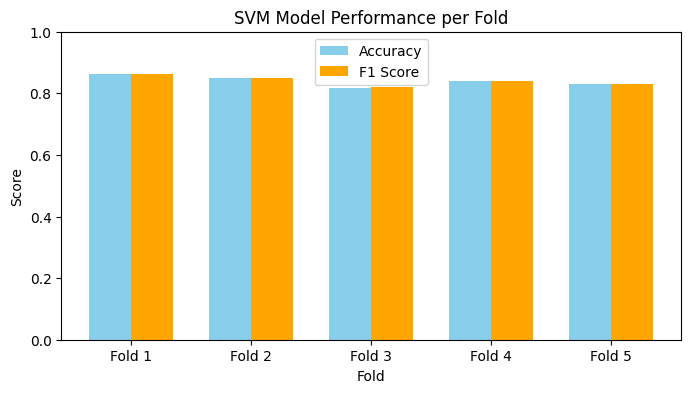

In [49]:
import numpy as np

x = np.arange(k)  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(8,4))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='orange')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('SVM Model Performance per Fold')
plt.xticks(x, [f'Fold {i}' for i in range(1, k+1)])
plt.ylim(0, 1)
plt.legend()
plt.show()


In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Set up Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Store results
accuracies = []
f1_scores = []

fold = 1
for train_index, test_index in skf.split(X_tfidf, y):
    print(f"\nFold {fold}")
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train
    rf_model.fit(X_train, y_train)

    # Predict
    y_pred = rf_model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    f1 = report['weighted avg']['f1-score']

    print("Accuracy:", acc)
    print("F1 Score:", f1)

    accuracies.append(acc)
    f1_scores.append(f1)
    fold += 1

# Final average results
print("\n=== Average Results Across Folds ===")
print("Mean Accuracy:", np.mean(accuracies))
print("Mean F1 Score:", np.mean(f1_scores))



Fold 1
Accuracy: 0.8635703918722787
F1 Score: 0.8637642421139755

Fold 2
Accuracy: 0.8490566037735849
F1 Score: 0.8496702341979645

Fold 3
Accuracy: 0.818577648766328
F1 Score: 0.8197424811409423

Fold 4
Accuracy: 0.8403483309143687
F1 Score: 0.8407404558577916

Fold 5
Accuracy: 0.8316400580551524
F1 Score: 0.8312419794840659

=== Average Results Across Folds ===
Mean Accuracy: 0.8406386066763425
Mean F1 Score: 0.841031878558948


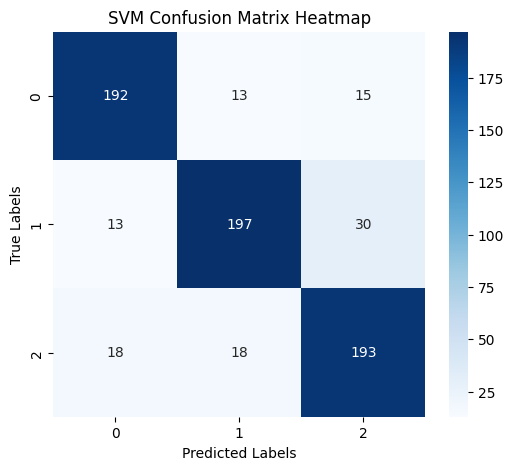

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

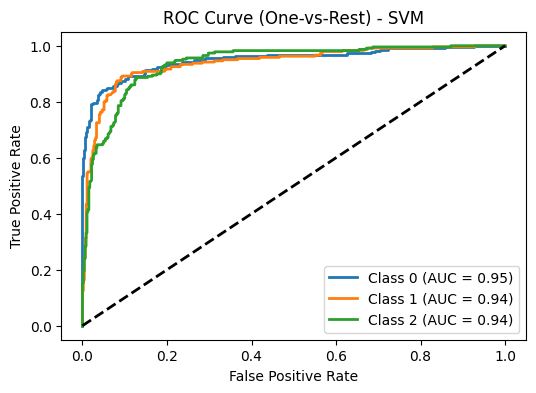

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
from google.colab import files  # for download in Colab

# Plot and save confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix Heatmap')
plt.savefig('svm_confusion_matrix.png')
plt.show()

# Download file directly
files.download('svm_confusion_matrix.png')

# Plot and save multiclass ROC curve
plt.figure(figsize=(6,4))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest) - SVM')
plt.legend(loc='lower right')
plt.savefig('svm_multiclass_roc_curve.png')
plt.show()

# Download file directly
files.download('svm_multiclass_roc_curve.png')


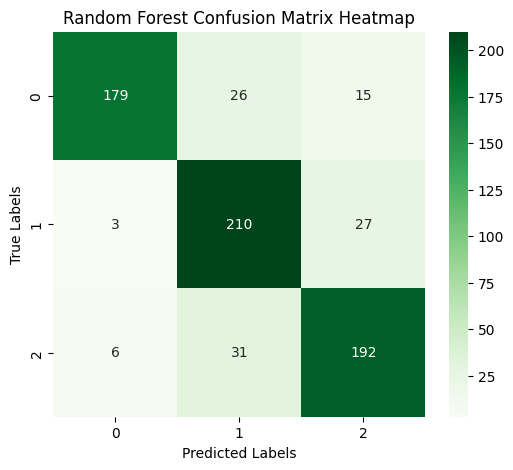

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

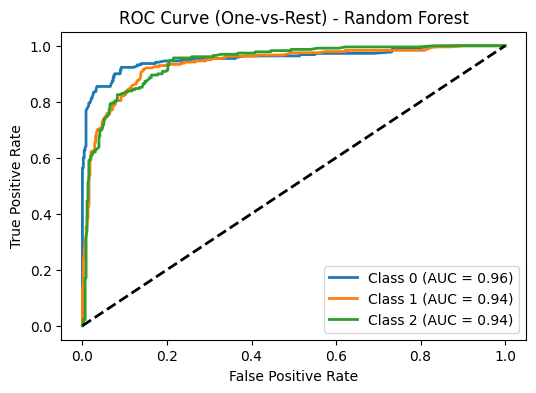

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files  # For direct download in Colab

# Split your data (replace X_tfidf, y with your variables)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict labels
y_pred = rf_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap of confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.savefig('rf_confusion_matrix.png')
plt.show()

# Direct download confusion matrix image
files.download('rf_confusion_matrix.png')

# Multiclass ROC curve
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = rf_model.predict_proba(X_test)

plt.figure(figsize=(6,4))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest) - Random Forest')
plt.legend(loc='lower right')
plt.savefig('rf_multiclass_roc_curve.png')
plt.show()

# Direct download ROC curve image
files.download('rf_multiclass_roc_curve.png')


In [58]:
# Example input
new_text = ["I feel really anxious and depressed lately."]  # Replace this with your actual input

# Vectorize input using the same TF-IDF vectorizer
new_text_tfidf = vectorizer.transform(new_text)  # Use the same vectorizer used before

# Predict
prediction = svm_model.predict(new_text_tfidf)

# Show result
print("Predicted Class:", prediction[0])


Predicted Class: 1


In [60]:
new_texts = [
    "Normal. Damn I can actually express emotions and feel a sense of positivity.",
    "Today was a great day, I feel amazing!",
    "I have trouble sleeping and feel stressed constantly."
]

new_texts_tfidf = vectorizer.transform(new_texts)
predictions = svm_model.predict(new_texts_tfidf)

# Show each input with its prediction
for text, label in zip(new_texts, predictions):
    print(f"Text: {text}\nPredicted Label: {label}\n")


Text: Normal. Damn I can actually express emotions and feel a sense of positivity.
Predicted Label: 1

Text: Today was a great day, I feel amazing!
Predicted Label: 2

Text: I have trouble sleeping and feel stressed constantly.
Predicted Label: 0



In [62]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Save the correct TF-IDF vectorizer object
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [63]:
from google.colab import files

files.download('svm_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>